# Correlation between most important sectors and CO2 emissions
In this notebook, we will calculate the correlations between the most important sectors and CO2 emissions to assess how well the dataset reflects these relationships.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### Data loading
Here we're loading the data that we'll need in this notebook to calculate the correlations.

In [2]:
data_root = './data/'

In [3]:
# Reading the data
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')
df_co2_sectors = pd.read_csv(f'{data_root}co2_emmisions_by_sector.csv')

In [4]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

In [5]:
# Calculating the average CO2 emission by country from the year 1970 to the year 2023
year_columns = [col for col in df_co2_europe.columns if col.isdigit()]

df_avg = df_co2_europe.copy()
df_avg["Average_CO2"] = df_avg[year_columns].mean(axis=1)

df_avg_sorted = df_avg.sort_values(by="Average_CO2", ascending=False)

# Getting the top5 countries with most average emissions 
# Which we'll try to find the leading factors for that cause
df_top_5 = df_avg_sorted[["Name", "Average_CO2"]].reset_index(drop=True).head(7)
print('Top 7 european countries with most emissions:')
df_top_5

Top 7 european countries with most emissions:


,Name,Average_CO2
0,Russia,1.826988e+06
1,Germany,9.285034e+05
2,United Kingdom,5.369989e+05
3,Ukraine,4.556760e+05
4,France,4.026492e+05
5,Italy,3.969357e+05
6,Poland,3.590356e+05


In [6]:
# Creating individual dataframes for the top 5 countries with most emissions containing emission per sector
df_russia = df_co2_sectors[(df_co2_sectors["Name"] == "Russian Federation") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_germany = df_co2_sectors[(df_co2_sectors["Name"] == "Germany") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_uk = df_co2_sectors[(df_co2_sectors["Name"] == "United Kingdom") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_ukraine = df_co2_sectors[(df_co2_sectors["Name"] == "Ukraine") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_france = df_co2_sectors[(df_co2_sectors["Name"] == "France") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_italy = df_co2_sectors[(df_co2_sectors["Name"] == "Italy") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_poland = df_co2_sectors[(df_co2_sectors["Name"] == "Poland") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)
df_sweden = df_co2_sectors[(df_co2_sectors["Name"] == "Sweden") & (df_co2_sectors["Substance"] == "CO2")].dropna(axis=0)

### Key sectors
These are some of the most significant sectors contributing to CO2 emissions, derived from the top 5 countries with the highest CO2 emissions.

In [7]:
# Some key sectors that should influence the CO2 emissions
sectors_of_interest = [
    "Public electricity and heat production",
    "Residential and other sectors",
    "Manufacturing Industries and Construction",
    "Road transportation no resuspension",
    "Cement production",
    "Production of metals",
    "Lime production",
    "Production of chemicals",
    "Fugitive emissions from solid fuels",
    "Fugitive emissions from oil and gas",
    "Fugitive emissions from gaseous fuels",
    "Rail transportation"
]

In [8]:
# Filtering the chosen sectors
df_russia_filtered = df_russia[df_russia["Sector"].isin(sectors_of_interest)]

df_germany_filtered = df_germany[df_germany["Sector"].isin(sectors_of_interest)]

df_uk_filtered = df_uk[df_uk["Sector"].isin(sectors_of_interest)]

df_ukraine_filtered = df_ukraine[df_ukraine["Sector"].isin(sectors_of_interest)]

df_france_filtered = df_france[df_france["Sector"].isin(sectors_of_interest)]

df_italy_filtered = df_italy[df_italy["Sector"].isin(sectors_of_interest)]

df_poland_filtered = df_poland[df_poland["Sector"].isin(sectors_of_interest)]

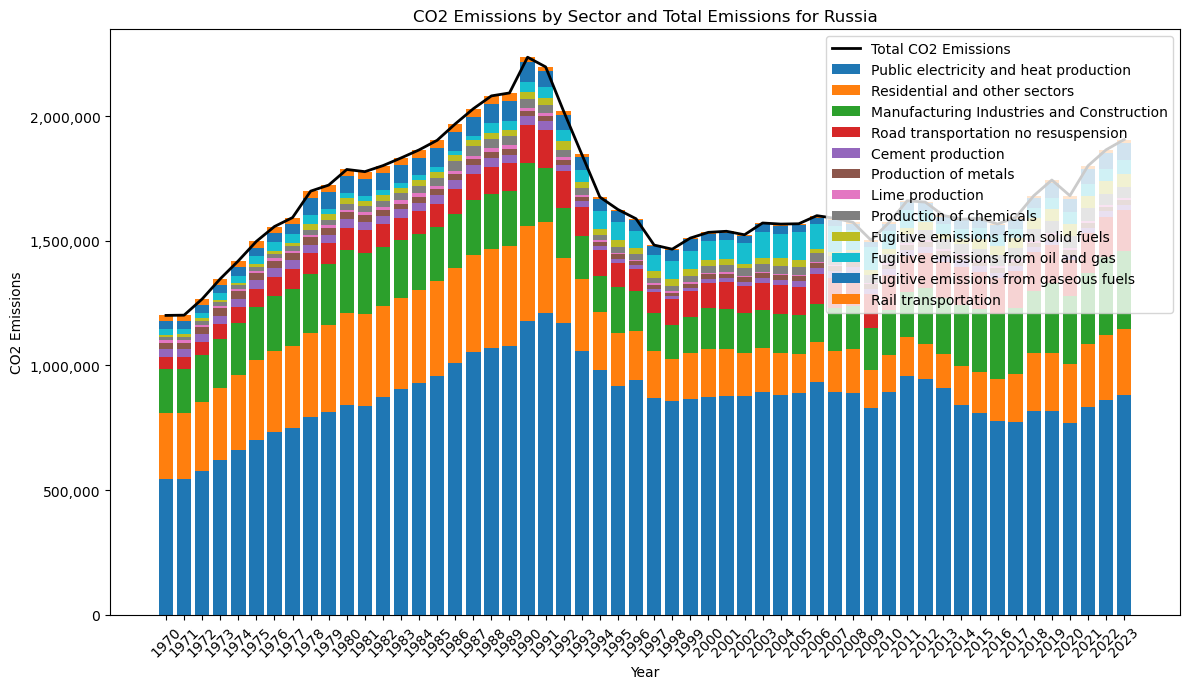

In [9]:
# Plotting the sectors emission and the total CO2 emission of Germany
year_columns = [str(year) for year in range(1970, 2024)]  

df_russia_sector_totals = df_russia_filtered[df_russia_filtered['Sector'].isin(sectors_of_interest)]
sector_emissions_by_year = df_russia_sector_totals.groupby('Sector')[year_columns].sum()

total_emissions_by_year = df_russia_filtered.groupby('Name')[year_columns].sum().loc['Russian Federation']

fig, ax = plt.subplots(figsize=(12, 7))

bottoms = np.zeros(len(total_emissions_by_year))  
for sector in sectors_of_interest:
    sector_data = sector_emissions_by_year.loc[sector].values
    ax.bar(year_columns, sector_data, bottom=bottoms, label=sector)
    bottoms += sector_data

ax.plot(year_columns, total_emissions_by_year, color='black', label="Total CO2 Emissions", linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax.set_title("CO2 Emissions by Sector and Total Emissions for Russia")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions")
ax.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualization of Russia's (the european country with most CO2 emissions) total CO2 emission and how much each "key" sector contributes to those emissions.

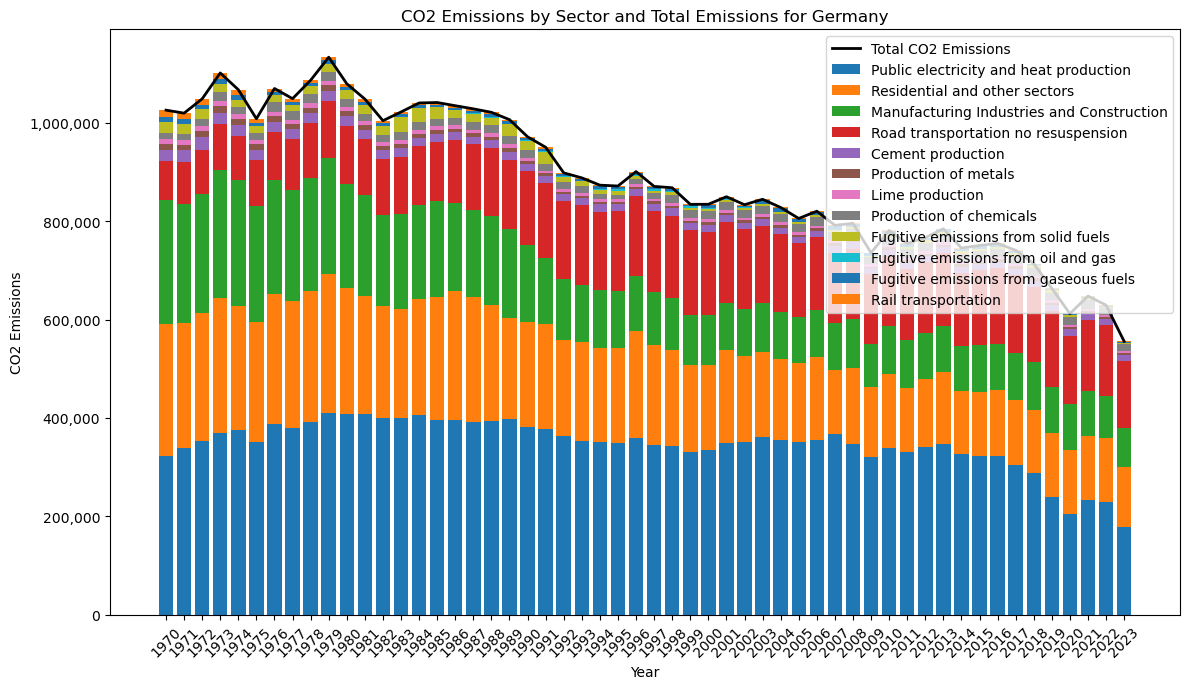

In [10]:
# Plotting the sectors emission and the total CO2 emission of Germany
year_columns = [str(year) for year in range(1970, 2024)]  

df_germany_sector_totals = df_germany_filtered[df_germany_filtered['Sector'].isin(sectors_of_interest)]
sector_emissions_by_year = df_germany_sector_totals.groupby('Sector')[year_columns].sum()

total_emissions_by_year = df_germany_filtered.groupby('Name')[year_columns].sum().loc['Germany']

fig, ax = plt.subplots(figsize=(12, 7))

bottoms = np.zeros(len(total_emissions_by_year))  
for sector in sectors_of_interest:
    sector_data = sector_emissions_by_year.loc[sector].values
    ax.bar(year_columns, sector_data, bottom=bottoms, label=sector)
    bottoms += sector_data

ax.plot(year_columns, total_emissions_by_year, color='black', label="Total CO2 Emissions", linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax.set_title("CO2 Emissions by Sector and Total Emissions for Germany")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions")
ax.legend(loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualization of Germany's (the european's second country with most CO2 emissions) total CO2 emission and how much each "key" sector contributes to those emissions.

In [11]:
# Calculating the correlations for some of the key sectors 
print(f'Calculating the correlations for some of the key sectors')
correlations = {}

for sector in sectors_of_interest:
    sector_data = sector_emissions_by_year.loc[sector].values
    correlation = np.corrcoef(sector_data, total_emissions_by_year)[0, 1]
    correlations[sector] = correlation

for sector, correlation in correlations.items():
    print(f"Correlation between {sector} emissions and total emissions: {correlation:.4f}")

Calculating the correlations for some of the key sectors
Correlation between Public electricity and heat production emissions and total emissions: 0.8459
Correlation between Residential and other sectors emissions and total emissions: 0.9593
Correlation between Manufacturing Industries and Construction emissions and total emissions: 0.8933
Correlation between Road transportation no resuspension emissions and total emissions: -0.6345
Correlation between Cement production emissions and total emissions: 0.7908
Correlation between Production of metals emissions and total emissions: 0.8046
Correlation between Lime production emissions and total emissions: 0.8698
Correlation between Production of chemicals emissions and total emissions: 0.0336
Correlation between Fugitive emissions from solid fuels emissions and total emissions: 0.8014
Correlation between Fugitive emissions from oil and gas emissions and total emissions: -0.0126
Correlation between Fugitive emissions from gaseous fuels emiss

From the total emissions data across Europe, we can identify which sectors show a strong correlation, indicating that they play a significant role in the overall CO2 emissions of European countries.

Some of the key sectors contributing significantly to CO2 emissions in Europe include:
 * Public electricity and heat production emissions
 * Residential and other sectors emissions
 * Manufacturing Industries and Construction emissions
 * Cement production emissions
 * Production of metals emissions and total emissions
 * Lime production emissions and total emissions

In [12]:
# Calculating and printing correlations for the chosen sectors in Russia and the total CO2 emissions
year_columns = df_co2_sectors.columns[5:]
df_russia[year_columns] = df_russia[year_columns].apply(pd.to_numeric, errors='coerce')

russia_total = df_russia[year_columns].groupby(df_russia["Name"]).sum().loc["Russian Federation"]

print("Correlation of each sector with total CO₂ emissions in Russia:\n")

for sector in df_russia["Sector"].unique():
    sector_data = df_russia[df_russia["Sector"] == sector][year_columns].sum()
    
    valid = (~russia_total.isna()) & (~sector_data.isna())
    if valid.sum() >= 2:
        corr = np.corrcoef(russia_total[valid], sector_data[valid])[0, 1]
        print(f"{sector}: {corr:.4f}")
    else:
        print(f"{sector}: Not enough valid data")

Correlation of each sector with total CO₂ emissions in Russia:

Public electricity and heat production: 0.8575
Other Energy Industries: 0.3609
Manufacturing Industries and Construction: 0.4282
Domestic aviation: 0.2670
Road transportation no resuspension: 0.4879
Rail transportation: 0.2951
Inland navigation: 0.2095
Other transportation: 0.1001
Residential and other sectors: 0.5204
Fugitive emissions from solid fuels: 0.4103
Fugitive emissions from gaseous fuels: 0.7845
Fugitive emissions from oil and gas: -0.1782
Cement production: 0.3222
Lime production: 0.5560
Limestone and dolomite use: 0.2021
Soda ash production and use: 0.1950
Production of other minerals: -0.0065
Production of chemicals: 0.4777
Production of metals: -0.0494
Solvent and other product use: paint: -0.2561
Solvent and other product use: degrease: -0.2541
Solvent and other product use: chemicals: -0.0515
Solvent and other product use: other: 0.1769


From the output above, we can see that some of the key sectors contributing significantly to CO2 emissions in Russia are **public electricity and heat production**, **manufacturing Industries and construction**, **rail transportation**, **fugitive emissions from solid fuels** and  **fugitive emissions from gaseous fuels**. These high emissions are largely driven by Russia’s long and harsh winters, which create a strong demand for heating across homes, businesses, and industries.

Additionally, Russia has a highly developed industrial sector and is one of the world’s largest producers of oil, natural gas, and coal. This results in significant emissions from industrial processes and energy production. The presence of extensive rail infrastructure, often powered by fossil fuels, and the extraction and handling of solid and gaseous fuels contribute further to the country’s total emissions through fugitive releases and combustion. Together, these factors make these sectors major contributors to Russia’s overall CO2 emissions profile.

In [13]:
# Calculating and printing correlations for the chosen sectors in Germany and the total CO2 emissions
year_columns = df_co2_sectors.columns[5:]
df_germany[year_columns] = df_germany[year_columns].apply(pd.to_numeric, errors='coerce')

germany_total = df_germany[year_columns].groupby(df_germany["Name"]).sum().loc["Germany"]

print("Correlation of each sector with total CO₂ emissions in Germany:\n")

for sector in df_germany["Sector"].unique():
    sector_data = df_germany[df_germany["Sector"] == sector][year_columns].sum()
    
    valid = (~germany_total.isna()) & (~sector_data.isna())
    if valid.sum() >= 2:
        corr = np.corrcoef(germany_total[valid], sector_data[valid])[0, 1]
        print(f"{sector}: {corr:.4f}")
    else:
        print(f"{sector}: Not enough valid data")
        

Correlation of each sector with total CO₂ emissions in Germany:

Public electricity and heat production: 0.8366
Other Energy Industries: 0.8921
Manufacturing Industries and Construction: 0.9015
Domestic aviation: -0.1547
Road transportation no resuspension: -0.6475
Rail transportation: 0.7707
Inland navigation: 0.9037
Residential and other sectors: 0.9618
Fugitive emissions from solid fuels: 0.8034
Fugitive emissions from gaseous fuels: 0.5913
Fugitive emissions from liquid fuels: -0.1361
Fugitive emissions from oil and gas: -0.0198
Cement production: 0.8029
Lime production: 0.8787
Soda ash production and use: -0.4836
Production of other minerals: -0.8124
Production of chemicals: 0.0291
Production of metals: 0.8151
Non-energy use of lubricants/waxes (CO2): 0.5986
Solvent and other product use: paint: 0.9161
Solvent and other product use: degrease: 0.8867
Solvent and other product use: chemicals: -0.5529
Solvent and other product use: other: -0.8031
Other direct soil emissions: 0.5987
W

Germany's CO₂ emissions are heavily influenced by sectors such as **public electricity and heat production**, **manufacturing industries and construction**, **other energy industries**, **fugitive emissions from solid fuels**, and **inland navigation**. The country’s strong industrial base demands large amounts of energy, much of which still comes from fossil fuels. Despite progress in renewable energy, coal and natural gas remain significant sources, especially for heating and electricity. Emissions also arise from fuel extraction and inland transportation, reflecting Germany's dense logistics network and energy infrastructure.

In [14]:
# Calculating and printing correlations for the chosen sectors in Sweden and the total CO2 emissions
year_columns = df_co2_sectors.columns[5:]
df_sweden[year_columns] = df_sweden[year_columns].apply(pd.to_numeric, errors='coerce')

sweden_total = df_sweden[year_columns].groupby(df_sweden["Name"]).sum().loc["Sweden"]

print("Correlation of each sector with total CO₂ emissions in Sweden:\n")

for sector in df_sweden["Sector"].unique():
    sector_data = df_sweden[df_sweden["Sector"] == sector][year_columns].sum()
    
    valid = (~sweden_total.isna()) & (~sector_data.isna())
    if valid.sum() >= 2:
        corr = np.corrcoef(sweden_total[valid], sector_data[valid])[0, 1]
        print(f"{sector}: {corr:.4f}")
    else:
        print(f"{sector}: Not enough valid data")
        

Correlation of each sector with total CO₂ emissions in Sweden:

Public electricity and heat production: 0.4190
Other Energy Industries: -0.7207
Manufacturing Industries and Construction: 0.9822
Domestic aviation: 0.7450
Road transportation no resuspension: -0.3679
Rail transportation: 0.7716
Inland navigation: -0.0272
Residential and other sectors: 0.9517
Fugitive emissions from solid fuels: -0.0491
Fugitive emissions from gaseous fuels: 0.7126
Fugitive emissions from oil and gas: -0.3798
Cement production: 0.1429
Lime production: 0.4360
Limestone and dolomite use: -0.0202
Soda ash production and use: -0.2802
Production of other minerals: -0.8654
Production of chemicals: -0.6258
Production of metals: 0.8672
Non-energy use of lubricants/waxes (CO2): 0.2869
Solvent and other product use: paint: 0.1869
Solvent and other product use: degrease: 0.7902
Solvent and other product use: chemicals: -0.2320
Solvent and other product use: other: -0.5676
Other direct soil emissions: 0.6287
Waste inc

In Sweden, the sectors with the highest correlation to total CO₂ emissions include **manufacturing industries and construction**, **residential and other sectors**, **rail transportation**, and **production of metals**. This reflects Sweden’s strong industrial activity, particularly in construction and metal production, which are energy-intensive processes. The high correlation with residential emissions is likely due to heating needs, especially in colder months. Rail transportation also contributes, though Sweden’s reliance on electrified rail helps keep these emissions relatively lower compared to other countries.

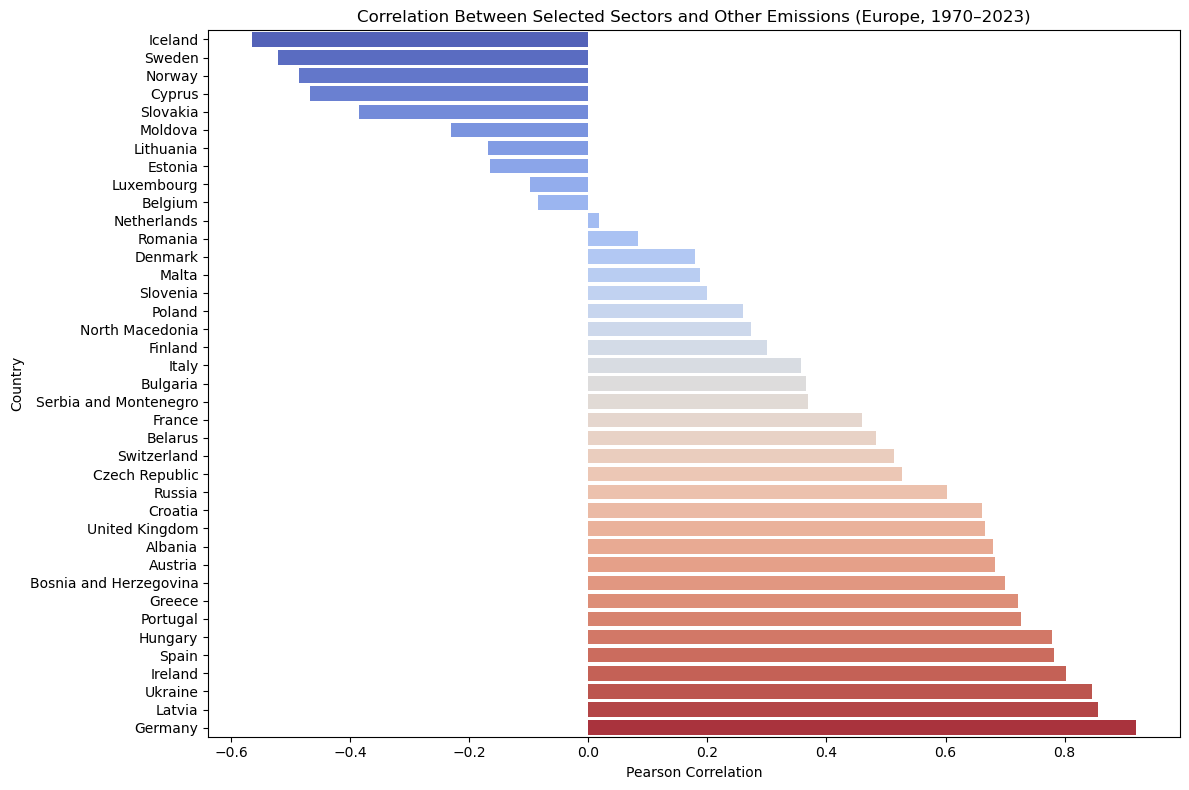

In [15]:
# Visual representation of the correlation of the chosen sectors and total CO2 emission of each european country
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

years = [str(year) for year in range(1970, 2024)]  


df_european_countries = df_co2_sectors[df_co2_sectors['Region'].str.contains('Europe', na=False)]

# Add Russia
df_russia = df_co2_sectors[df_co2_sectors['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2_sectors[df_co2_sectors['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2_sectors[df_co2_sectors['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2_sectors[df_co2_sectors['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_european_countries = pd.concat([df_european_countries, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

df_european_countries[years] = df_european_countries[years].apply(pd.to_numeric, errors='coerce')

selected_df = df_european_countries[df_european_countries["Sector"].isin(sectors_of_interest)]
other_df = df_european_countries[~df_european_countries["Sector"].isin(sectors_of_interest)]

correlations = []

for country in df_european_countries["Name"].unique():
    selected = selected_df[selected_df["Name"] == country][years].sum()
    other = other_df[other_df["Name"] == country][years].sum()

    valid = ~np.isnan(selected) & ~np.isnan(other)

    if valid.sum() > 1:  
        sel = selected[valid]
        oth = other[valid]

        if np.std(sel) > 0 and np.std(oth) > 0:
            corr = np.corrcoef(sel, oth)[0, 1]
            correlations.append((country, corr))

correlation_df = pd.DataFrame(correlations, columns=["Country", "Correlation"]).sort_values(by="Correlation")

plt.figure(figsize=(12, 8))
sns.barplot(x="Correlation", y="Country", data=correlation_df, palette="coolwarm")
plt.title("Correlation Between Selected Sectors and Other Emissions (Europe, 1970–2023)")
plt.xlabel("Pearson Correlation")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

* For each European country, we calculated the correlation between the sum of emissions from the selected sectors and the emissions from all other sectors. This was done by comparing the emissions for each sector and checking if there’s a significant relationship between them.
* We filtered the dataset to focus on the selected sectors and the rest of the emissions data (non-selected sectors) for European countries.
* Then we calculated the correlations using Pearson’s method, with the resulting values stored and visualized in a bar plot.
* Some countries show strong positive correlations (close to 1), indicating that emissions from the selected sectors are highly related to the rest of the emissions.
* Other countries show negative or low correlations, suggesting that emissions from the selected sectors don’t correlate strongly with the overall emissions, or in some cases, they are inversely related.

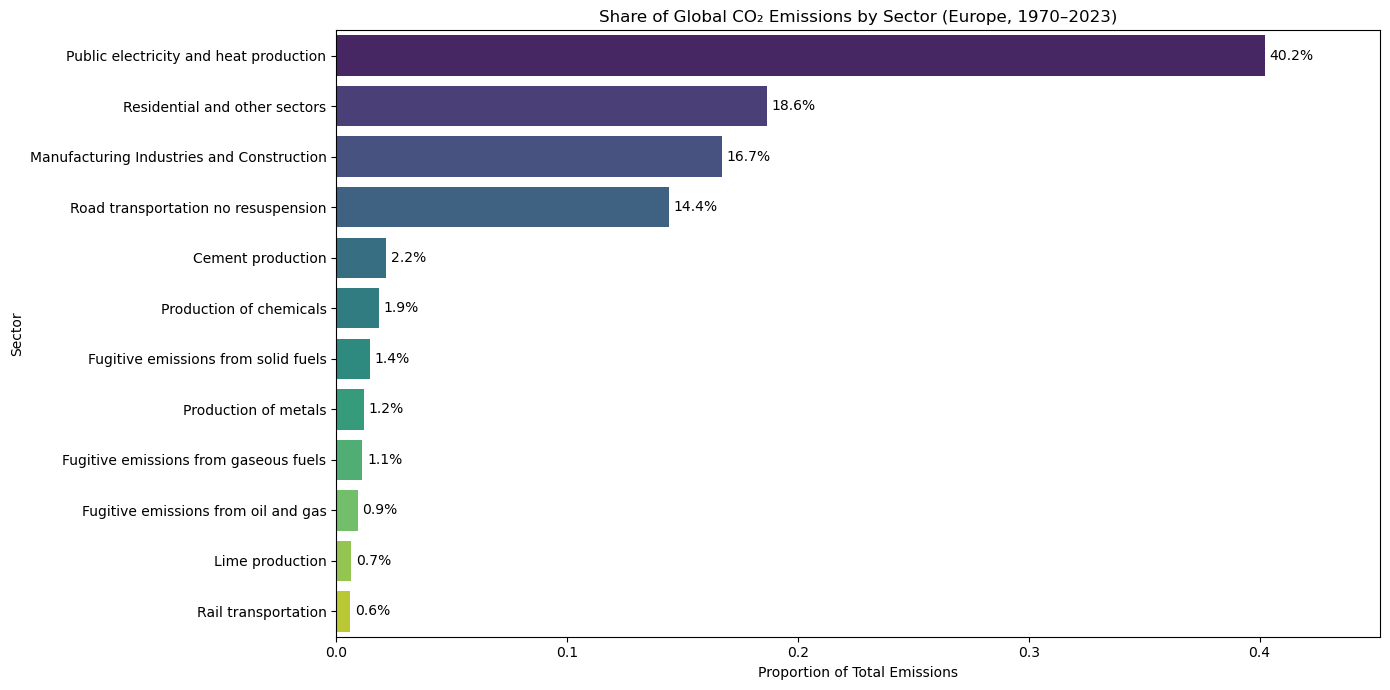

In [16]:
# Total correlation of the chosen sectors and the total CO2 emissions of every country
df_european_countries_filtered = df_european_countries[df_european_countries["Sector"].isin(sectors_of_interest)]
df_european_countries_filtered[years] = df_european_countries_filtered[years].apply(pd.to_numeric, errors='coerce')

sector_totals = df_european_countries_filtered.groupby('Sector')[years].sum().sum(axis=1)

sector_proportions = sector_totals / sector_totals.sum()
sector_proportions = sector_proportions.reset_index()
sector_proportions.columns = ['Sector', 'Proportion']

sector_proportions = sector_proportions.sort_values(by='Proportion', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=sector_proportions, y='Sector', x='Proportion', palette='viridis')

for i, (val, sector) in enumerate(zip(sector_proportions['Proportion'], sector_proportions['Sector'])):
    plt.text(val + 0.002, i, f'{val:.1%}', va='center')

plt.xlabel('Proportion of Total Emissions')
plt.ylabel('Sector')
plt.title('Share of Global CO₂ Emissions by Sector (Europe, 1970–2023)')
plt.xlim(0, sector_proportions['Proportion'].max() + 0.05)
plt.tight_layout()
plt.show()

* We've calculated the total emissions for each sector across all years. This step sums up the emissions for each sector across all countries in Europe.
* Then we compared the total emissions of each sector to the overall total emissions of all sectors, resulting in the proportion of emissions contributed by each sector.
* And we created a bar plot to visualize the proportion of total CO₂ emissions contributed by each sector. Each bar represents a sector’s share of total emissions, and the percentage is displayed next to each bar.
* The plot shows which sectors contribute the most to CO₂ emissions across Europe, helping to identify the sectors with the largest environmental impact. (In the future researching we can test other sectors, to see if we can find even better ones)